In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [5]:
df.sample(10)

id    qid1    qid2  \
133493  133493  213542  213543   
167709  167709  259948  259949   
247543  247543  360792  360793   
380215  380215   47105  511823   
147406  147406   51201  171458   
129225  129225     313   71620   
157827  157827  246681  246682   
90644    90644  120083   82605   
257554  257554   52298   30647   
97982    97982  162905  162906   

                                                question1  \
133493  If J can paint a room in 6 hours, and T can pa...   
167709  What are the best motivational topics which ca...   
247543       Does Airtel provide franchises in Hyderabad?   
380215            What is your favorite historical event?   
147406              What is it like to have a huge penis?   
129225  If I do not monetize YouTube videos & upload c...   
157827                       Walk me through your resume?   
90644   How many cigarettes does Shahrukh Khan smoke i...   
257554             How can I earn money part time online?   
97982          What font is used for American road signs?   

                                                question2  is_duplicate  
133493  It takes 2 carpenters 4 hours to build 3 bookc...             0  
167709          How can I motivate students to do better?             0  
247543  What are the best franchises to open in Hydera...             0  
380215  What is your favorite photo of a historical ev...             0  
147406                Whats it like to have a huge penis?             1  
129225  How can I upload anime on YouTube without copy...             1  
157827  How would you respond to the question, "Walk m...             0  
90644   Is it harmful to smoke just one cigarette ever...             0  
257554                     How could I make money online?             1  
97982            What font do they use for US road signs?             1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

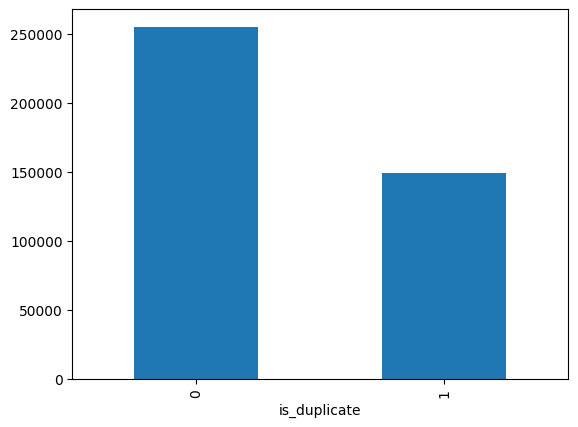

In [9]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


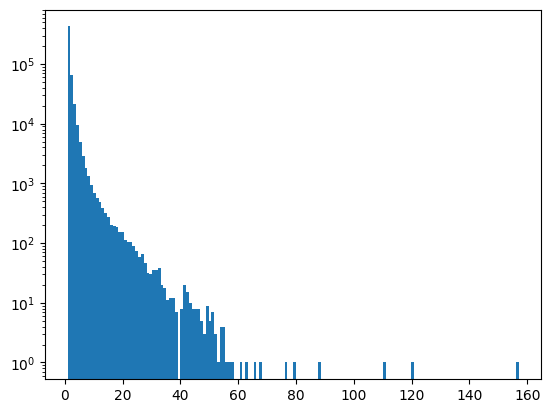

In [11]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()